# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Lathif Nurma Huda
- **Email:** mc604d5y0872@student.devacademy.id
- **ID Dicoding:** MC604D5Y0872

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda dari bulan ke bulan?
- Apakah pengguna terdaftar atau pengguna kasual lebih mendominasi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# memuat tabel day
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# memuat tabel hour
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Import dua data dari bike sharing dataset day.csv dan hour.csv

### Assessing Data

In [6]:
# Menilai data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah dilakukan pengecekan terdapat 1 kesalahan terhadap data type. Pada column dteday (object ==> datetime)

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Memeriksa duplikasi data
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


In [9]:
# Menampilkan ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti tabel day_df, setelah dilakukan pengecekan terdapat 1 kesalahan terhadap data type. Pada column dteday (object ==> datetime)

In [11]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
# Memeriksa duplikasi data
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [13]:
# Menampilkan ringkasan parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
hour_df = hour_df[(hour_df['temp'] >= 0) & (hour_df['temp'] <= 1)]
hour_df = hour_df[(hour_df['hum'] >= 0) & (hour_df['hum'] <= 1)]
hour_df = hour_df[hour_df['windspeed'] >= 0]

### Cleaning Data

menghapus beberapa kolom yang tidak dibutuhkan

In [15]:
day_col_drop = ['windspeed', 'weekday']
day_df.drop(day_col_drop, axis=1, inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Beberapa column dihapus karena tidak diperlukan dalam analisa pertanyaan bisnis yang telah ditetapkan

windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

In [19]:
#merubah tipe data kolom ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

#merubah tipe data kolom ke category
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Beberapa tipe data object dan int64 diubah menjadi datetime dan category

In [20]:
hour_col_drop = ['windspeed', 'weekday']
hour_df.drop(hour_col_drop, axis=1, inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Beberapa kolom tidak diperlukan
- windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
- weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

In [21]:
#merubah tipe data kolom ke datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

#merubah tipe data kolom ke category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Beberapa tipe data object dan int64 diubah menjadi datetime dan category

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,3410.000000,6946.000000,8714.000000


In [26]:
day_df.groupby(by="season", observed=True).registered.nunique().sort_values(ascending=False)

,registered
season,
3,181
2,180
1,177
4,177


In [25]:
day_df.groupby(by="workingday", observed=True).registered.nunique().sort_values(ascending=False)

,registered
workingday,
1,476
0,223


In [31]:
# 1. Membuat Prediksi: Hubungan antara cuaca dan jumlah pengguna (day_df)
day_df.groupby("weathersit", observed=True).agg({
    "weathersit": "nunique",
    "cnt": ["mean", "sum", "count"]
})

weathersit          cnt               
              nunique         mean      sum count
weathersit                                       
1                   1  4876.786177  2257952   463
2                   1  4035.862348   996858   247
3                   1  1803.285714    37869    21

In [32]:
# 2. Mengategorikan Berbagai Hal: Cluster pengguna berdasarkan musim (day_df)
day_df.groupby("season", observed=True).agg({
    "cnt": "sum"
}).reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [33]:
# 3. Menemukan Sesuatu yang Tidak Biasa: Statistik penyewaan untuk deteksi outlier (day_df)
day_df.groupby("season", observed=True).agg({
    "cnt": ["mean", "std", "max", "min"]
})

cnt                         
               mean          std   max   min
season                                      
1       2604.132597  1399.942119  7836   431
2       4992.331522  1695.977235  8362   795
3       5644.303191  1459.800381  8714  1115
4       4728.162921  1699.615261  8555    22

In [34]:
# 4. Mengidentifikasi Tema: Contoh tren pengguna terdaftar vs casual (day_df)
day_df.groupby("dteday").agg({
    "registered": "sum",
    "casual": "sum"
}).reset_index().head()

,dteday,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82


In [35]:
# 5. Menemukan Hubungan: Korelasi antara suhu dan jumlah penyewaan (day_df)
day_df[["temp", "cnt"]].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [24]:
# 6. Menemukan Pola: Pola penyewaan berdasarkan jam (hour_df)
hour_df.groupby("hr").agg({
    "cnt": "mean"
}).reset_index().head()

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


In [39]:
# 7. Mengategorikan Penyewaan Berdasarkan Jam dan Cuaca (hour_df)
hour_df.groupby(["hr", "weathersit"], observed=True).agg({
    "cnt": ["mean", "sum", "count"]
}).reset_index().head()

hr weathersit        cnt             
                      mean    sum count
0  0          1  59.161554  28930   489
1  0          2  47.232432   8738   185
2  0          3  28.115385   1462    52
3  1          1  34.395918  16854   490
4  1          2  35.541899   6362   179

In [40]:
# 8. Menemukan Pola Harian: Penyewaan berdasarkan jam dan hari kerja (hour_df)
hour_df.groupby(["hr", "workingday"], observed=True).agg({
    "cnt": "mean"
}).reset_index().head()

,hr,workingday,cnt
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053


In [27]:
# Gabungkan kedua DataFrame berdasarkan kolom 'dteday'
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,hr,holiday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,...,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,...,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,...,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,...,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,...,4,0,0,1,0.24,0.2879,0.75,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda dari bulan ke bulan?

In [30]:
print(all_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [51]:
monthly_rentals_df = all_df.resample(rule='ME', on='dteday').agg({
    "cnt_x": "sum",              # Total penyewaan sepeda
    "registered_x": "sum",       # Total pengguna terdaftar
    "casual_x": "sum"            # Total pengguna kasual
})
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')
monthly_rentals_df = monthly_rentals_df.reset_index()
monthly_rentals_df.rename(columns={
    "cnt_x": "total_rentals",
    "registered_x": "registered_users",
    "casual_x": "casual_users"
}, inplace=True)
monthly_rentals_df.head()

,dteday,total_rentals,registered_users,casual_users
0,2011-01,870969,799718,71251
1,2011-02,1119397,973236,146161
2,2011-03,1511511,1208517,302994
3,2011-04,2273532,1738083,535449
4,2011-05,3259704,2514504,745200


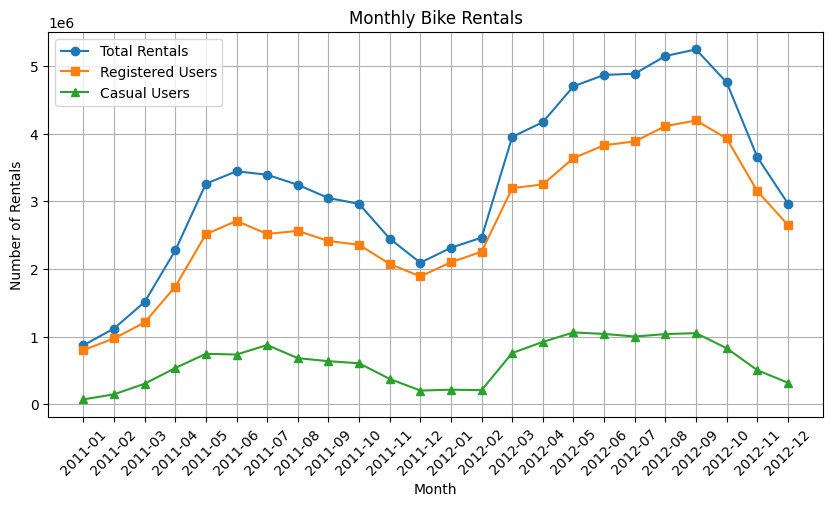

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['total_rentals'], label='Total Rentals', marker='o')
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['registered_users'], label='Registered Users', marker='s')
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['casual_users'], label='Casual Users', marker='^')

plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Monthly Bike Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Jumlah Penyewaan Total Mengikuti Pola Musiman:

- Biasanya jumlah penyewaan meningkat pada bulan-bulan tertentu (misalnya musim panas atau liburan).
- Ini wajar, karena pengguna lebih suka bersepeda saat cuaca cerah atau saat ada banyak acara luar ruangan.

### Pertanyaan 2: Apakah pengguna terdaftar atau pengguna kasual lebih mendominasi penyewaan sepeda?

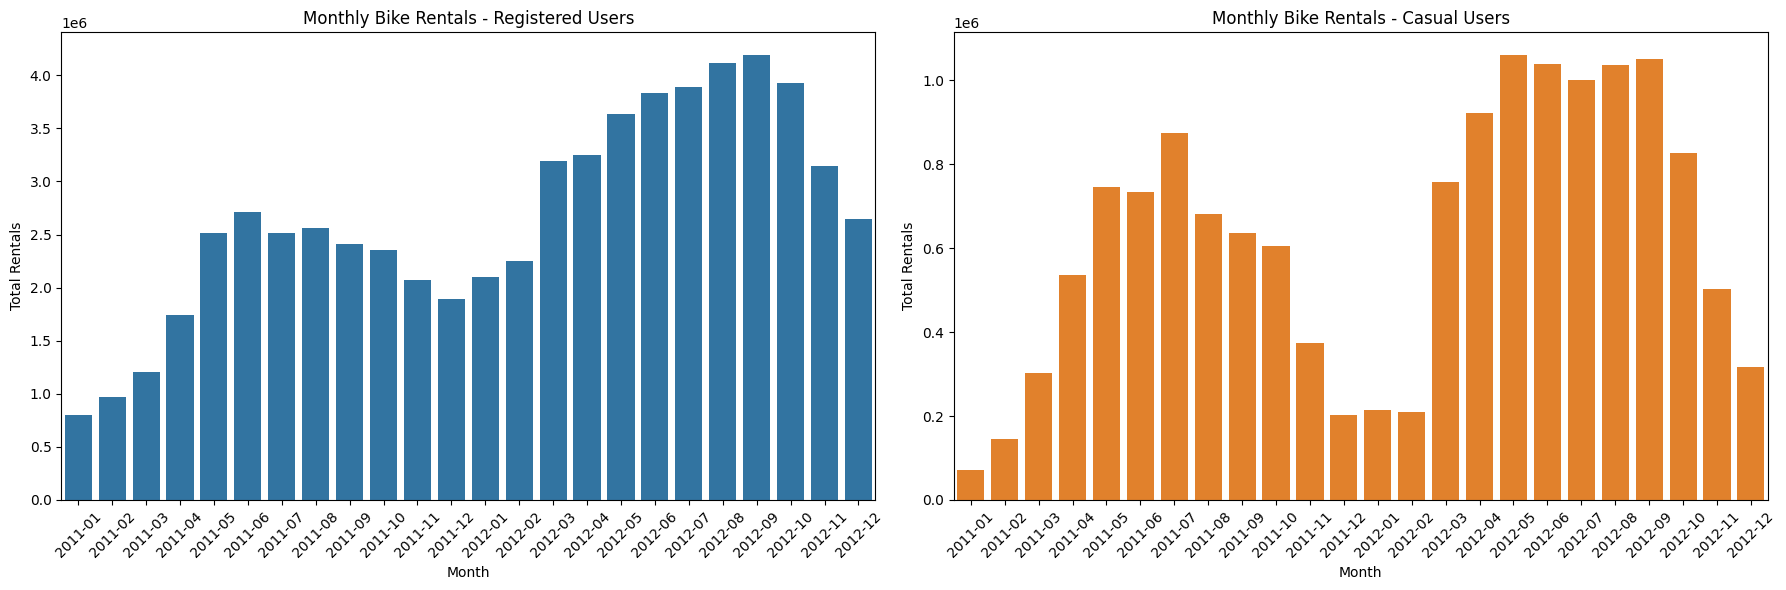

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='dteday', y='registered_users', data=monthly_rentals_df, ax=ax[0], color='#1f77b4')
ax[0].set_title('Monthly Bike Rentals - Registered Users')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Rentals')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='dteday', y='casual_users', data=monthly_rentals_df, ax=ax[1], color='#ff7f0e')
ax[1].set_title('Monthly Bike Rentals - Casual Users')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Rentals')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Jumlah registered users (pengguna terdaftar) jauh lebih tinggi dibandingkan casual users di sebagian besar bulan.
- Casual users cenderung naik di bulan-bulan tertentu (misalnya musim panas atau liburan).

## Analisis Lanjutan (Opsional)

In [47]:
snapshot_date = all_df['dteday'].max()

if pd.isnull(snapshot_date):
    raise ValueError("Tanggal snapshot tidak ditemukan. Pastikan kolom 'dteday' berisi tanggal yang valid.")

rfm_df = all_df.groupby('registered_x').agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,  # Recency
    'instant_x': 'count',                                # Frequency
    'cnt_x': 'sum'                                       # Monetary
})

rfm_df.rename(columns={
    'dteday': 'recency',
    'instant_x': 'frequency',
    'cnt_x': 'monetary'
}, inplace=True)

rfm_df.reset_index(inplace=True)
rfm_df.head()


,registered_x,recency,frequency,monetary
0,20,63,1,22
1,416,704,8,3448
2,432,5,24,10584
3,451,372,23,17342
4,472,705,16,8096


In [46]:
print(all_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


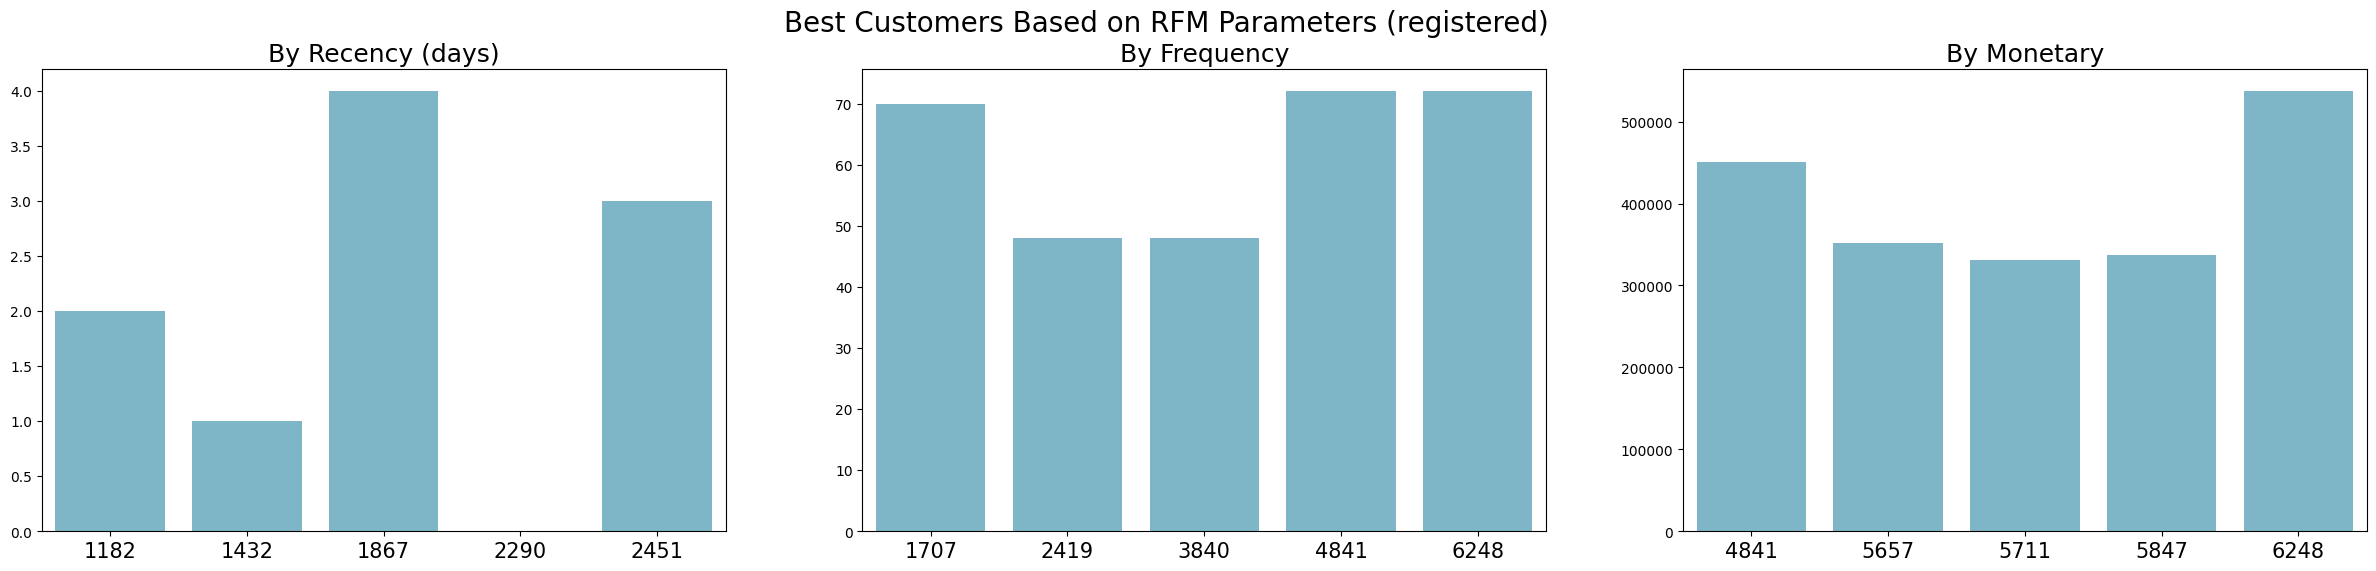

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Recency
sns.barplot(y="recency", x="registered_x", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color="#72BCD4", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency
sns.barplot(y="frequency", x="registered_x", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color="#72BCD4", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary
sns.barplot(y="monetary", x="registered_x", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color="#72BCD4", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customers Based on RFM Parameters (registered)", fontsize=20)
plt.show()


## Conclusion

- Conclution pertanyaan 1
Jumlah penyewaan sepeda menunjukkan pola musiman yang jelas. Penyewaan cenderung meningkat pada bulan-bulan tertentu, terutama saat cuaca lebih bersahabat (musim semi dan panas). Ini mengindikasikan bahwa faktor musim sangat mempengaruhi minat pengguna untuk menyewa sepeda, baik pengguna terdaftar maupun kasual.
- Conclution pertanyaan 2
Pengguna terdaftar secara konsisten mendominasi penyewaan sepeda dibandingkan pengguna kasual. Ini menunjukkan bahwa ada basis pengguna loyal yang sering memanfaatkan layanan ini, sementara pengguna kasual cenderung naik saat akhir pekan atau musim liburan.

In [52]:
all_df.to_csv("all_data.csv", index=False)